In [1]:
from pylab import *
import numpy as np

# Homework 6: Angular Momentum

## Part I
The centrifugal radius: $R_c = \frac{j^2}{GM_*}$ tells us how angular momentum determines the radius at which material is deposited at during infall into disk formation. 
If we assume angular momentum conservation from the envelope down to the disk scales, we know that over time each infalling layer, i,  at a radius of $r_i$ has specific angular momentum $j_i = r_i^2 \Omega_i$.

### part a
In the TSC model, for $\dot{M}_{in} = \frac{m_0 c_s^3}{G}$, each layer falls from a radius $r_i = (m_0/2) c_s t$ where $m_0 = 0.975$, a dimensionless constant and $c_s$ is the isothermal sound speed. 
For this model, derive $M_{*}(t)$ and $R_c(t)$. 

**Integrate $\dot{M}_{in} = \frac{m_0 c_s^3}{G}$ to get $M_{*}(t)$:**

**$M_{*}(t) = \int \frac{m_0 c_s^{3}}{G}dt = \frac{m_0 c_s^{3} t}{G}$**

**Plug this into the centrifugal radius, along with radius $r_i$:**

**$R_c = \frac{j^2}{GM_*} = \frac{r_i^4 \Omega_i^2 G}{G m_0 c_s^{3} t} = \frac{m_0^4 c_s^4 \Omega_i^2 t^4}{16 m_0 c_s^3 t} = \frac{m_0^3 c_s \Omega_i^2 t^3}{16}$**

In [2]:
m_0 = 0.975  # dimensionless
G = 6.6743e-8  # gravitational constant in cm3 g-1 s-2


def M_t(c_s, t):
    return m_0 * c_s**3 * t / G


def R_t(c_s, omega_i, t):
    return m_0**3 * c_s * omega_i**2 * t**3 / 16

### part b
The break-up angular velocity of a rotating body is defined as where the gravitational energy is equal to the rotational energy. Above this value, the body would be torn apart by rotation as gravity would not be able to hold it together. 
Derive the break-up velocity for a protostellar core and calculate it in radians per second for a 1 solar mass core of about 0.1 pc in size. 

**For a rotating protostellar core, setting gravitational and rotational energy for a sphere equal to one another:**

**gravitional $E = \frac{3 G M^2}{5 R}$ and rotational $E = \frac{1}{2}I \Omega^2 = \frac{1}{2}(\frac{2}{5} M R^2) \Omega^2$**

**Canceling terms and rearranging,**

$\Omega = \sqrt{\frac{3 G M}{R^3}}$

In [4]:
# calculating the break-up velocity
msuntog = 2e33  # M_sun to g
pctocm = 3.086e18  # pc to cm


def omega_bu(M_sol, R_pc):
    M = M_sol * msuntog
    R = R_pc * pctocm
    return np.sqrt(3 * G * M / R**3)


print("The break-up velocity is " + str(omega_bu(M_sol=1, R_pc=0.1)) + " radians per second.")

The break-up velocity is 1.1673056952271192e-13 radians per second.


### part c
Plot $R_c(t)$ for $c_s = 0.2 \ \mathrm{km \ s^{-1}}$ and $\Omega_i = 2 \times 10^{-14} \mathrm{rad \ s^{-1}}$ for t between 0 and 500 kyr. How fast is the input angular velocity compared to break up? What is the resulting disk size at t=500 kyr? How much mass would have infallen in that time span?

Text(0, 0.5, 'Centrifugal Radius [cm]')

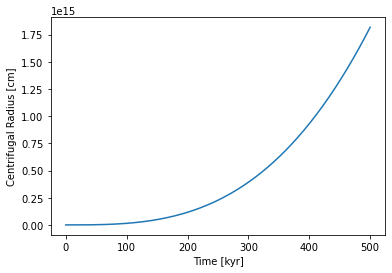

In [21]:
yrtos = 3.154e7  # yrs to sec
time = np.linspace(0, 5e5*yrtos, 200)

R_c = R_t(c_s=0.2*1e5, omega_i=2e-14, t=time)

plt.plot((time/yrtos)/1e3, R_c)
plt.xlabel('Time [kyr]')
plt.ylabel('Centrifugal Radius [cm]')

**The input angular velocity is only 17% the break-up velocity. The resulting disk size at t=500 kyr is 0.0005889562158501271 pc.**

In [18]:
M_c = M_t(c_s=0.2*1e5, t=time)
print("The amount of mass that would have infallen in that timespan is " + str(M_c[-1]) + " g, or " + str(M_c[-1]/msuntog) + " solar masses.")

The amount of mass that would have infallen in that timespan is 1.8429797881425766e+33 g, or 0.9214898940712883 solar masses.


### part d
So far we have only been assuming that $\Omega_i$ is constant solid body rotation, but in principle $\Omega_i(r)$ could be a function of radius within the protostellar core. For instance, if we take the scaling of an turbulent sub-sonic eddy as in Larson's law, $v_{rot} \propto R^{-0.33}$. Solve for the corresponding $\Omega_i(r)$ and $R_c(t)$ with this more generalized behavior. 

### part e
Let's say that the angular velocity has the form: $\Omega_s \left( \frac{r}{r_s}\right)^{p}$. Where $\Omega_s =  2 \times 10^{-14} \mathrm{rad \ s^{-1}}$ at $r_s = 0.05 \ \mathrm{pc}$ (to match measured values from observations at the same scale). Plot $Rc(t)$ for both the  uniform $\Omega_i$ and the turbulent $\Omega_i$ case on the same plot, assuming the power-law form above. When do both models have the same $R_c$? 
Based on what you know about mass deposition during disk formation, qualitatively, what would be the difference betweeen the disks formed under these two assumptions?

/var/folders/w5/vlw_hh7n5wnfpjv4n_100kq40000gn/T/ipykernel_15157/2105586265.py:5: RuntimeWarning: divide by zero encountered in power
  return omega_s * (r/(r_s*pctocm))**p
/var/folders/w5/vlw_hh7n5wnfpjv4n_100kq40000gn/T/ipykernel_15157/3184085281.py:10: RuntimeWarning: invalid value encountered in multiply
  return m_0**3 * c_s * omega_i**2 * t**3 / 16


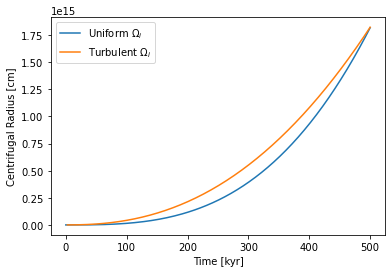

In [33]:
def omega_turbulent(c_s, omega_s, t):
    r_s = 0.05
    r = (m_0/2) * c_s * t
    p = -0.33
    return omega_s * (r/(r_s*pctocm))**p


omega_turb = omega_turbulent(c_s=0.2*1e5, omega_s=2e-14, t=time)
R_turb = R_t(c_s=0.2*1e5, omega_i=omega_turb, t=time)

plt.plot((time/yrtos)/1e3, R_c, label='Uniform $\Omega_i$')
plt.plot((time/yrtos)/1e3, R_turb, label='Turbulent $\Omega_i$')
plt.xlabel('Time [kyr]')
plt.ylabel('Centrifugal Radius [cm]')
plt.legend()

**Both models have the same $R_c$ for the first ~50 kyr and again at 500 kyr, so mass deposition in both cases proceeds along the same timescale. In the turbulent case, it seems that deposition of material onto the disk is less gradual than in the uniform case. Perhaps this would result in a less smoothly deposited disk as the material infalls more swiftly and intensely.**

## Part II: *Menu* 

For additional menu points this week, use the $Rc(t)$ you calculated above, and the $\dot{\Sigma}(r,t)$ profile from Cassen+Moosman 1981 to numerically integrate through time to calculate $\Sigma(t)$ for the two cases in part d. (This gives us a very rough understanding of the resulting disk as it does not take into account angular momentum transport during this phase). Plot the resulting surface density profiles and comment on their differences. 

*Hint*: You may want your timesteps to be logarithmically spaced